
# Project: Creating Customer Segments

## Overview

In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.



In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration


In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


###  Selecting Samples


In [3]:

indices = [10,50,80]


samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3366,5403,12974,4400,5977,1744
1,6269,1095,1980,3860,609,2162
2,7005,829,3009,430,610,529


### Table Description

First Customer
The mean of 'Fresh' is  12000.297727 and the customer is purchasing 3366 units well below mean, mean of 'Milk' is	5796.265909 and the customer is purchasing 5403 units just below mean value. Mean of 'Grocery is 7951.277273 and the customer is purchasing 12974 units much more than mean value. Mean value of 'Frozen' is 3071.931818 and the customer is purchasing 4400 units just above mean. The mean value of Detergents_paper is 2881.493182 and the customer is purchasing 5977 much above mean value. Finally, the mean value of Delicatessen is	1524.870455 and the customer is purchasing 1744 slightly above mean value. Overall the customer is purchasing less 'Fresh', more 'Grocery','Detergents_paper' to the mean value, slightly more 'Frozen','Delicatessen' to mean value and less 'Milk' to mean value. 
The customer may be retailler because he is purchasing more quantites of goods that may lost longer or goods that are fast selling (much more than their mean values). He is purchasing other goods near mean values.Finally, I strongly beleive customer0 may be a retailer having a small store in a different region where he may sell all these purchased goods.

Second Customer
The second customer (customer1) is purchasing 6269 units of 'Fresh' less compared to mean of 'Fresh', 1095 units of 'Milk' very less compared to its mean, 1980 units of 'Grocery' which is much less than its mean, 3860 units of 'Frozen' which is slightly more than its mean value, 609 units of 'Detergents_paper which is much  less than its mean,2162 units of 'Delicatesen' which is more than its mean value. To conclude the customer is purchasing  more units of 'Delicatesen' and 'Frozen' compared to their mean and purchasing other products less compared their mean. So he may be having a restaurent

Third Customer
The third customer (customer2) is purchasing 7005 units of 'Fresh' less compared to mean of 'Fresh', 829 units of 'Milk' very less compared to its mean, 3009 units of 'Grocery' which is much less than its mean, 430 units of 'Frozen' which is less than its mean value, 610 units of 'Detergents_paper which is much  less than its mean,529 units of 'Delicatesen' which is less than its mean value. To conclude the customer may be having a restaurent.

In [4]:

from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split

milk_var = data['Milk']
#display(milk_var.head(n = 10))
new_data = data.drop('Milk', axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, milk_var, test_size = 0.2, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = tree.DecisionTreeRegressor(random_state=1)
regressor.fit(X_train,y_train)
pred=regressor.predict(X_test)


score = r2_score(y_test,pred)
print score

Grocery_var = data['Grocery']
#display(milk_var.head(n = 10))
new_data = data.drop('Grocery', axis = 1)


X_train, X_test, y_train, y_test = train_test_split(new_data, Grocery_var, test_size = 0.25, random_state = 0)


regressor = tree.DecisionTreeRegressor(random_state=1)
regressor.fit(X_train,y_train)
pred=regressor.predict(X_test)


score = r2_score(y_test,pred)
print score




Detergents_paper_var = data['Detergents_Paper']
#display(milk_var.head(n = 10))
new_data = data.drop('Detergents_Paper', axis = 1)


X_train, X_test, y_train, y_test = train_test_split(new_data, Detergents_paper_var, test_size = 0.2, random_state = 0)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = tree.DecisionTreeRegressor(random_state=1)
regressor.fit(X_train,y_train)
pred=regressor.predict(X_test)


score = r2_score(y_test,pred)
print score



0.42145128853
0.625703685304
0.710596807825


I attempted to predict Milk, Grocery and Detergents_Paper. The reported prediction scores are 0.42145128853, 0.987504757166 and 0.991763986475 respectively. Milk got low score of 0.42 so this feature is necessary for identifying customers' spending habits. But  Grocery  got some what high score of 0.62 , so it can be approximated to better compared to 'Milk' using other features. Grocery may not be required for identifying customers' spending habits. Similarly Detergents_Paper also got good score 0.7105 so, it may not also be required for identifying customers' spending habits. 

### Visualize Feature Distributions


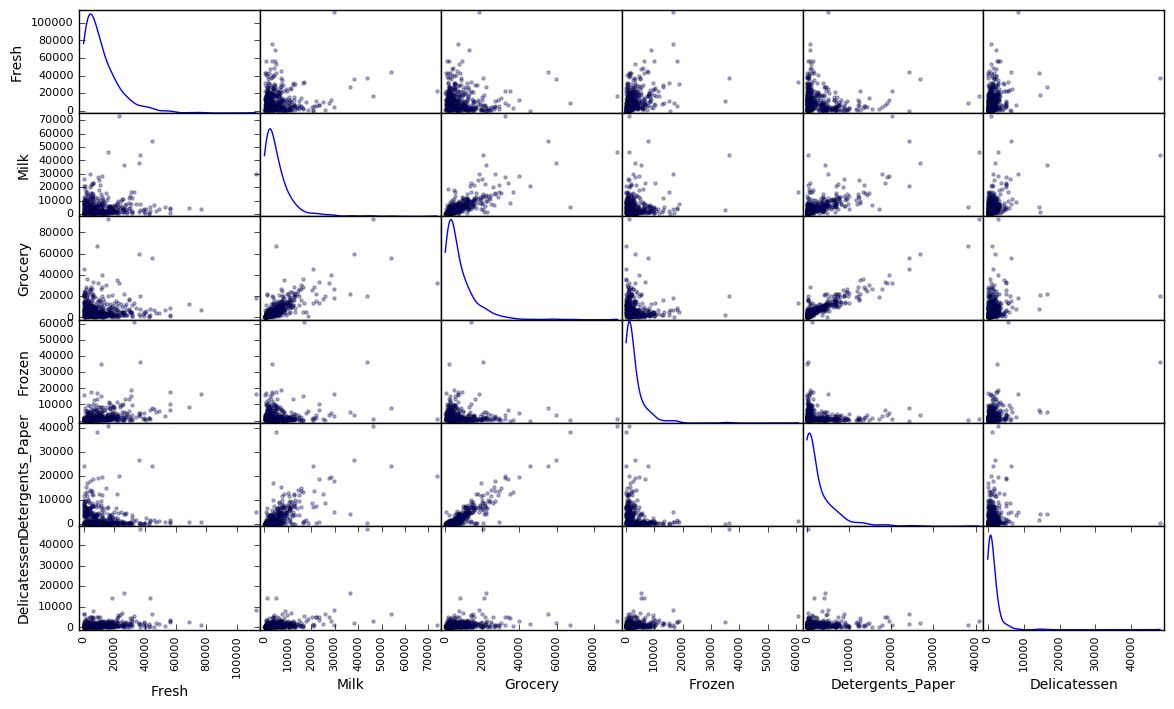

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

Some pairs of features exhibited good degree of correlation, they are grocery and Detergents_paper, Detergents_paper and Milk, Grocery and Milk. It confirmed my suspicions about relevance of features.The datat distributions consists of skewed values.

## Data Preprocessing


### Feature Scaling


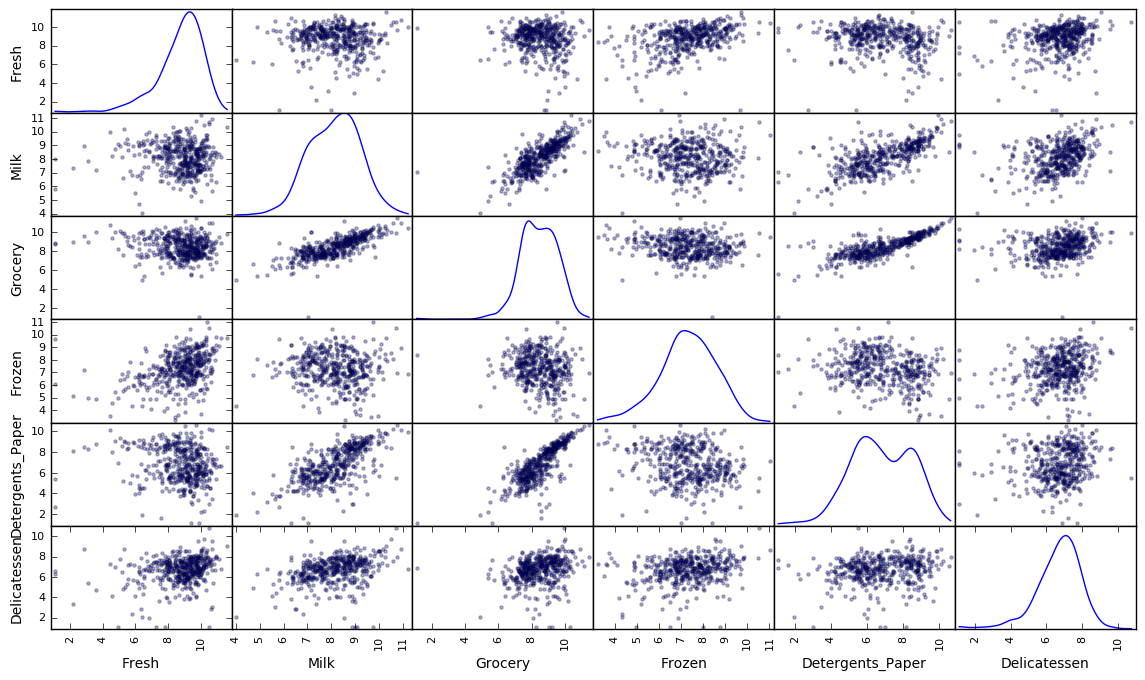

In [6]:

log_data = np.log(data.copy(deep=True))


log_samples =np.log(samples.copy(deep=True))

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.121480,8.59471,9.470703,8.389360,8.695674,7.463937
1,8.743372,6.99851,7.590852,8.258422,6.411818,7.678789
2,8.854379,6.72022,8.009363,6.063785,6.413459,6.270988


###  Outlier Detection


In [8]:
# For each feature find the data points with extreme high or low values
all_outliers=[]
display(log_data.describe())
for feature in log_data.keys():
    print 'outliers for', feature
    
    Q1 = np.percentile(log_data[feature],25)
    
    
    Q3 = np.percentile(log_data[feature],75)
    
   
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outlier=(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    all_outliers.append(outlier.index.values)
print all_outliers 


mixed =[my for sublist in all_outliers for my in sublist]
outliers_list = []




for outlier in mixed:
  outliers_list.append({'count': mixed.count(outlier), 'outlier':outlier})  

# create dataframe to better visualize outliers in multiple features
outlier_df = pd.DataFrame(outliers_list).drop_duplicates(['outlier'])
print outlier_df 




# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [65,66,128,154,75]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


outliers for Fresh
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


outliers for Milk
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


outliers for Grocery
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


outliers for Frozen
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


outliers for Detergents_Paper
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


outliers for Delicatessen
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[array([ 65,  66,  81,  95,  96, 128, 171, 193, 218, 304, 305, 338, 353,
       355, 357, 412], dtype=int64), array([ 86,  98, 154, 356], dtype=int64), array([ 75, 154], dtype=int64), array([ 38,  57,  65, 145, 175, 264, 325, 420, 429, 439], dtype=int64), array([ 75, 161], dtype=int64), array([ 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343], dtype=int64)]
    count  outlier
0       2       65
1       2       66
2       1       81
3       1       95
4       1       96
5       2      128
6       1      171
7       1      193
8       1      218
9       1      304
10      1      305
11      1      338
12      1      353
13      1      355
14      1      357
15      1      412
16      1       86
17      1       98
18      3      154
19      1      356
20      2       75
22      1       38
23      1       57
25      1      145
26      1      175
27      1      264
28      1      325
29      1      420
30      1      429
31      1      439
33      1      161
35      1   

There are some features considered as ouliers for more than one feature, for example- 66,154,75,128. Yes, these data points should be removed to get good performance of prediction algorithms. Outliers that belong to more than one feature shouldn't be removed from outlier list. Generally, removing of outliers (of multiple features)would result more performance or generalization by predictor. I suggest  data points that are outliers of single features should be removed from outlier list.

## Feature Transformation


###  PCA




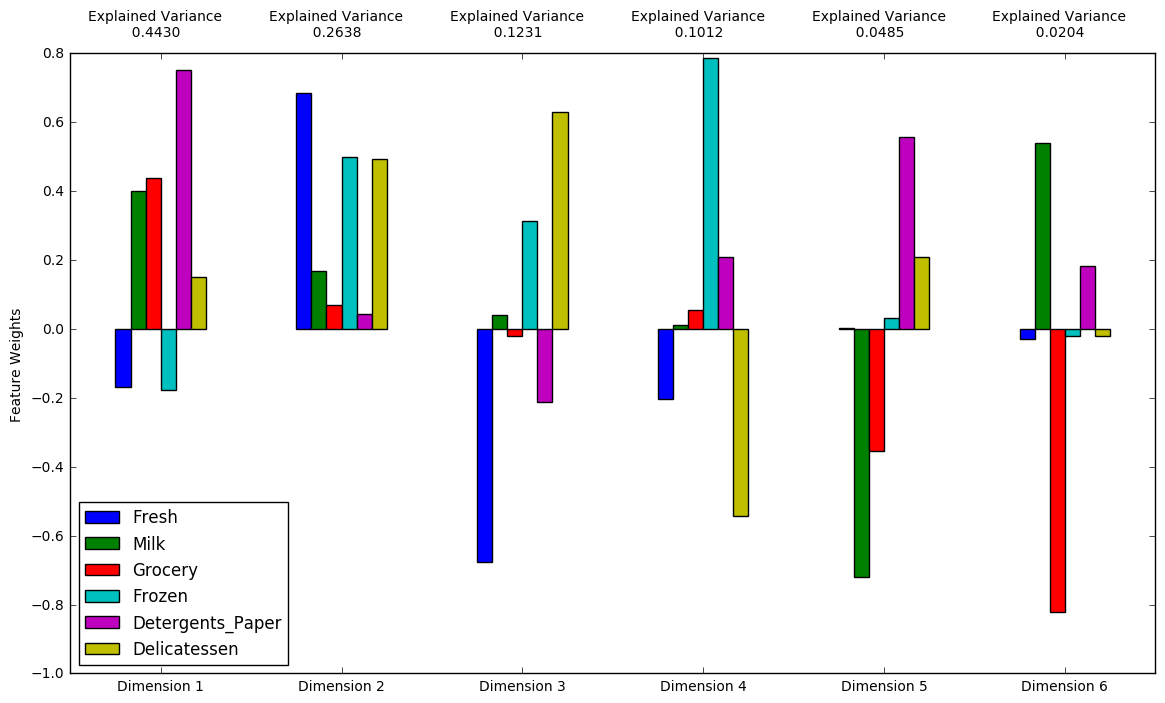

In [9]:

from sklearn.decomposition import PCA
n_components = 6
pca = PCA(n_components=n_components, whiten=True).fit(good_data)


pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In first and second principal components 0.7068(70%) of varience is explained.In first four components 0.9311(93%) of varience is explained.

In first componenet Fresh and Frozen  are negative-weighted and Detergents_paper,Grocery, Delicatessen and Milk are positive-weighted. With the help of first component we can capture  customers that don't purchase  Fresh and Frozen  and  who purchase Detergents_paper,delicatessen,Grocery and Milk.

In second componenet, all features are having positive-weights. this component captures group of customers that  buy all the products. In particular more amounts of Fresh, Frozen and  Delicatessen . Small amounts of Grocery,Milk,Detergents_paper.

In third component Frozen, Delicatessen and Milk have positive-weights and Fresh,Detergents_paper is having negative-weights. Grocery are having very low negative weight. Grocery is having very low negative weight; The component captures group of customers that purchase  Frozen,Delicatessen and some milk.

In fourth component Frozen ,  Detergents paper,Grocery and Milk are positive-weighted, Delicasten and  Fresh  are negative-weighted. This component captures group of customers that purchase more Frozen ,  Detergents paper and some small amounts of Grocery and Milk

### Observation


In [10]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.9805,0.4262,0.7603,0.9924,0.7925,-0.5458
1,-0.5353,0.4082,0.8748,0.0592,1.6205,-0.0121
2,-0.4253,-0.6472,-0.6136,-0.8864,1.1744,-0.9390


###  Dimensionality Reduction


In [19]:

n_components = 2
pca = PCA(n_components=n_components, whiten=True).fit(good_data)


reduced_data = pca.transform(good_data)


pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation


In [20]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,0.9805,0.4262
1,-0.5353,0.4082
2,-0.4253,-0.6472


## Visualizing a Biplot


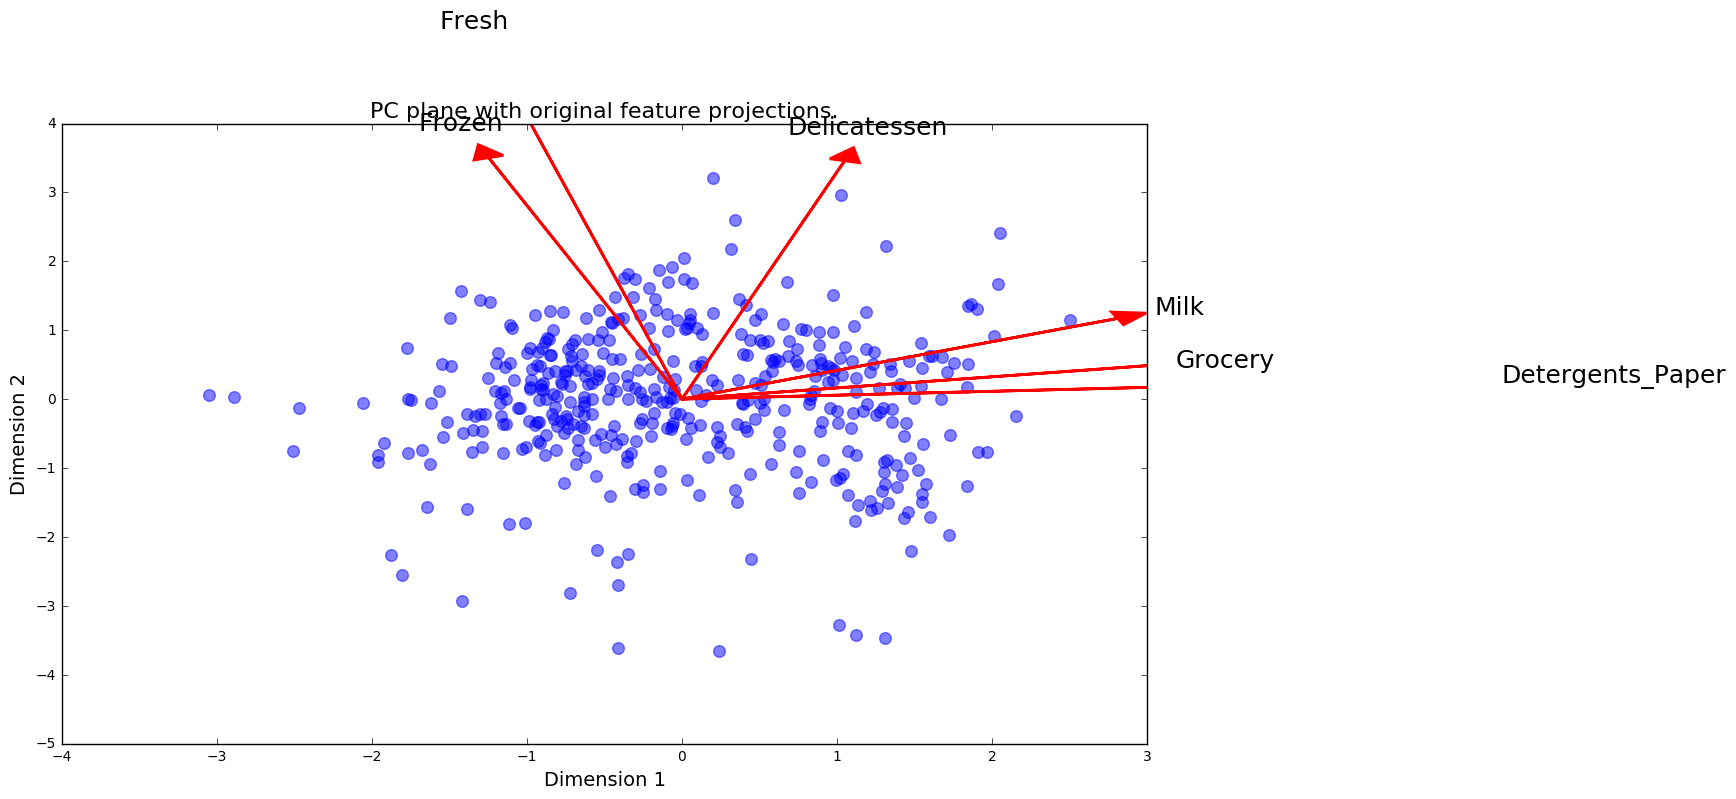

In [21]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation



## Clustering



K-Means
Advantages
1.Computationally faster
2.K-Means produces tight clusters
Disdavantages
1.Difficulat to predict K Value
2.Different initial partitions may result in different final clusters

Gaussian Mixture Model(GMM)
Advantages
1.Performs soft assignment
2.GMM accomidates mixed membership
3.Fastet algorithm to assign mixed models

Since GMM accomidates mixed memberships, I would like use GMM



###  Creating Clusters


In [22]:
from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn.metrics  import silhouette_score

 
clusterer = mixture.GMM(n_components=2,random_state=0).fit(reduced_data)


preds = clusterer.predict(reduced_data)


centers = clusterer.means_


sample_preds = clusterer.predict(pca_samples)


score =silhouette_score(reduced_data,preds)
print score



clusterer = mixture.GMM(n_components=5,random_state=0).fit(reduced_data)


preds = clusterer.predict(reduced_data)


centers = clusterer.means_


sample_preds = clusterer.predict(pca_samples)


score =silhouette_score(reduced_data,preds)
print score


clusterer = mixture.GMM(n_components=8,random_state=0).fit(reduced_data)


preds = clusterer.predict(reduced_data)


centers = clusterer.means_


sample_preds = clusterer.predict(pca_samples)


score =silhouette_score(reduced_data,preds)
print score


clusterer = mixture.GMM(n_components=12,random_state=0).fit(reduced_data)


preds = clusterer.predict(reduced_data)


centers = clusterer.means_


sample_preds = clusterer.predict(pca_samples)


score =silhouette_score(reduced_data,preds)
print score


clusterer = mixture.GMM(n_components=18,random_state=0).fit(reduced_data)


preds = clusterer.predict(reduced_data)


centers = clusterer.means_


sample_preds = clusterer.predict(pca_samples)


score =silhouette_score(reduced_data,preds)
print score


clusterer = mixture.GMM(n_components=2,random_state=0).fit(reduced_data)


preds = clusterer.predict(reduced_data)


centers = clusterer.means_


sample_preds = clusterer.predict(pca_samples)


score =silhouette_score(reduced_data,preds)
print score

0.367919613967
0.305906086894
0.287612161239
0.28915693486
0.198029058995
0.367919613967


I tried for 2,5,8,12,18 clusters and I got silhouette scores 0.36,0.30,0.287
0.289 and 0.198 respectively. Out of which with 2 clusters I got best score of 0.36

### Cluster Visualization


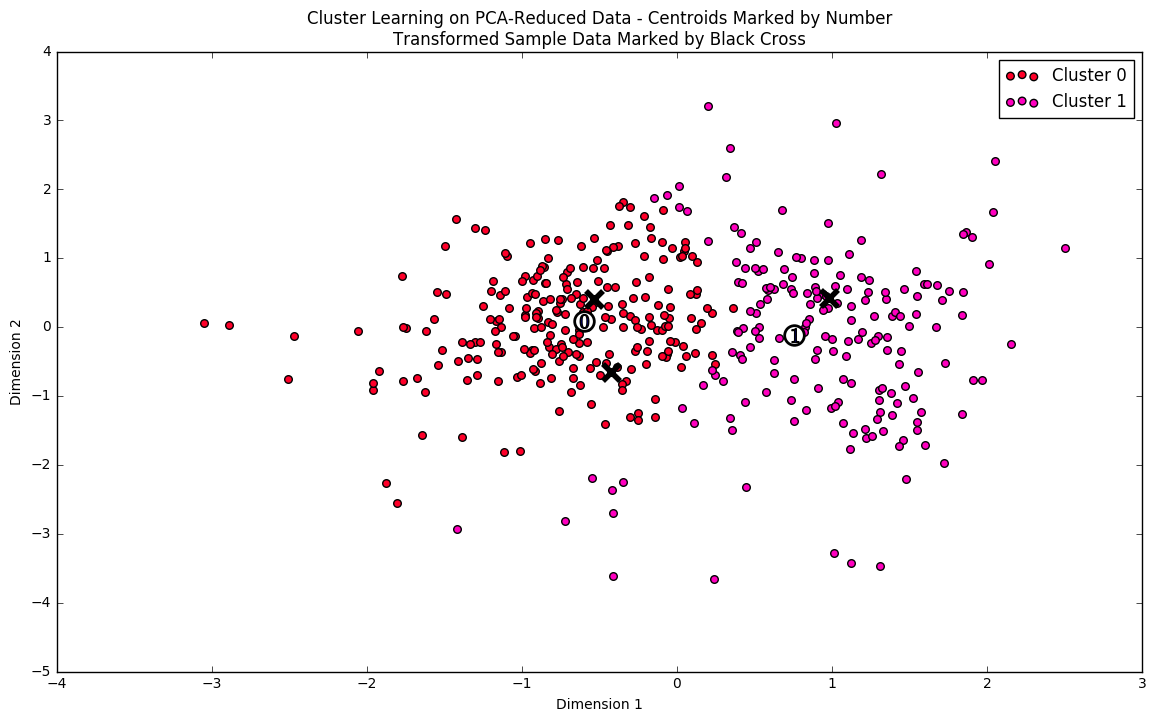

In [23]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

###  Data Recovery


In [24]:

log_centers =pca.inverse_transform(centers)


true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8779.0,2079.0,2726.0,2049.0,345.0,717.0
Segment 1,4327.0,6266.0,9426.0,1040.0,2976.0,939.0


Segment1 may be retailer because the customers in that segment is purchasing large amount of 'Grocery', 'Milk' and less 'Fresh'.  But customers of  segment0 are purchasing high amount of Fresh compared to Grocery and Detergents_paper. so, the cluster  may belong to restaurents.


In [25]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


In question1  sample_point0 is forecasted as retailer because  the customer is purchasing less 'Fresh', more 'Grocery','Detergents_paper' to the mean value, slightly more 'Frozen','Delicatessen' to mean value and less 'Milk' to mean value. As given in Question8, Retaillers belong to cluster1 and it was predicted as cluster1. So the prediction is  right. 
Similarly sample_point1 and sample_point2 are having big purchases in Fresh and less purchase in Grocery, they are forecasted as restaurents in Question1. so they should be predicted as cluster0 and they are predicted as cluster0. So predictions are  consistent.

## Conclusion

We first assume that the change in delivery service doesn't effects customers of both clusters equally. Because cluster1 belong to retailers, they may acept delivery schemes less frequently. But cluster2 belongs to restaurents , so they maynot accept the new delivery schemes.

To prove the hypothesis, we divide the total customers to two groups (group1 and group2). We keep high representative customers from two clusters in both groups equally. group1 would me much smaller group compared to group2, which is a sample of customers in both clusters. First, we change the delivery service to group1 and collect the feedback, if there are any complaints we revert the change and continue delivery service 5 days a week. If there are no complaints we implement the change in delivery service to group2 also.

If some customers in group1 that belong to cluster1  complain then new delivery scheme is implemented to customers of cluster2. If customers that belong to cluster2 complain, then new delivery scheme is implemented to customers of cluster1.

We could have additional variable 'Customer segment' as a target variable a supervised learning algorithm may predict.

### Visualizing Underlying Distributions



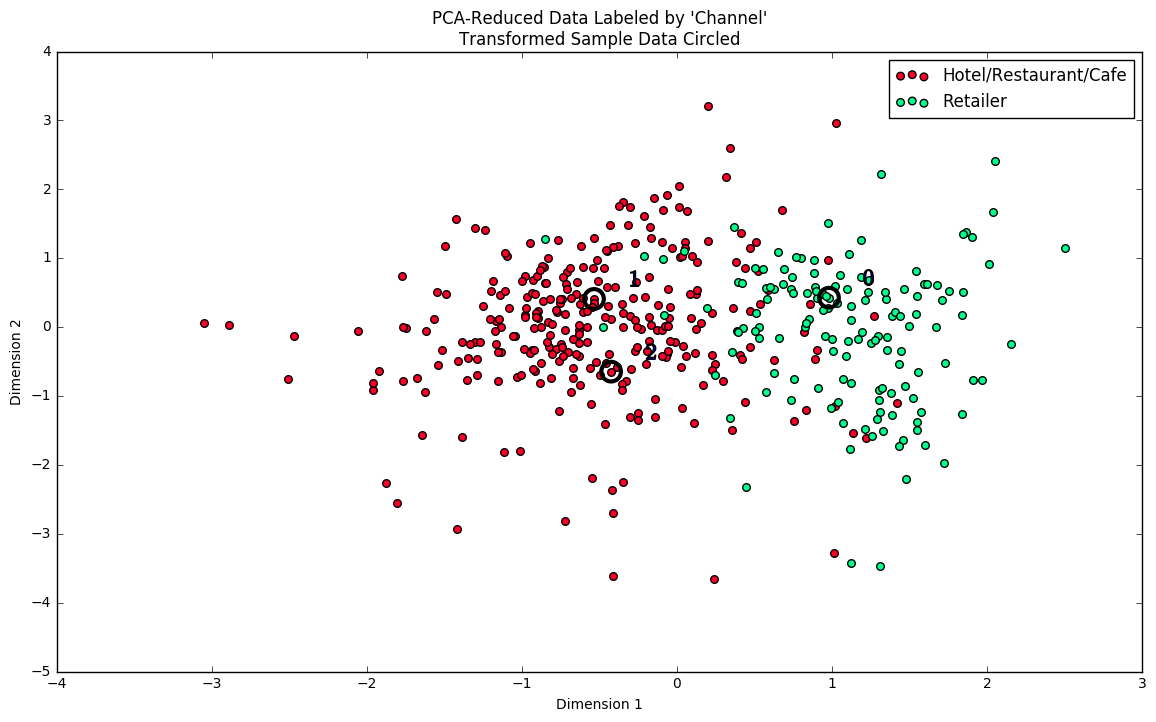

In [26]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

These classifications are consistent with previous definitions. The clustering algorithm  divided the total customers to two clusters (restaurents and retailers). These two clusters are sufficient to explain the cutomer behavior. These segments doesn't classify purely retailers and restaurents. The algorithm missed some observations. Both clusters suffered contamination from other clusters.